In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ML projects\files\titanic_data.csv")

In [3]:
print(df.head(10))
print(df.shape)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [4]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,889.00,889.00,713.00,889.00,889.00,889.00
mean,0.38,2.31,29.70,0.52,0.38,32.26
std,0.49,0.84,14.54,1.10,0.81,49.74
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

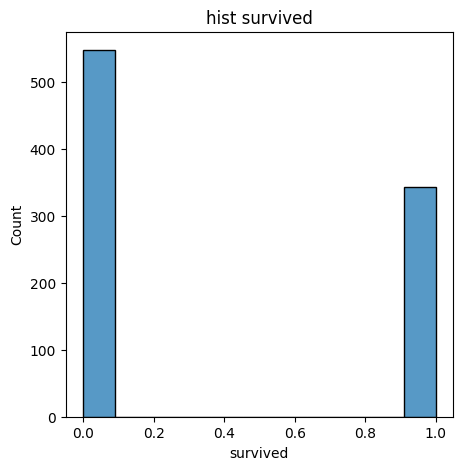

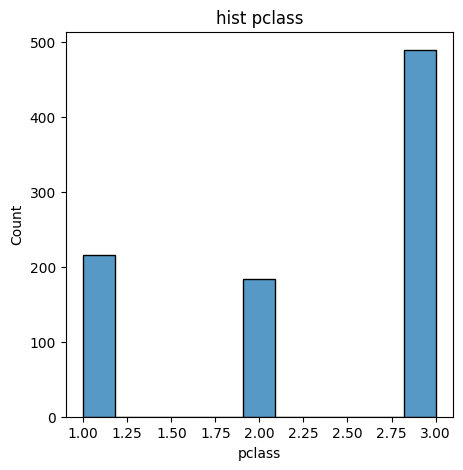

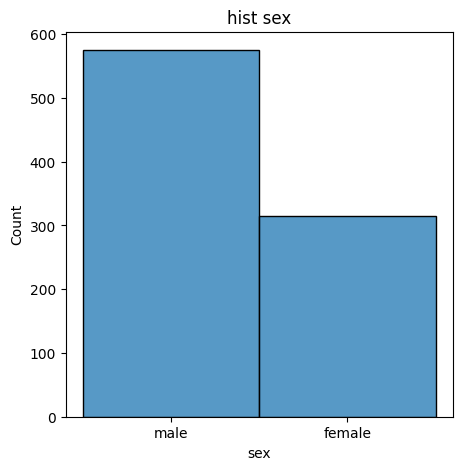

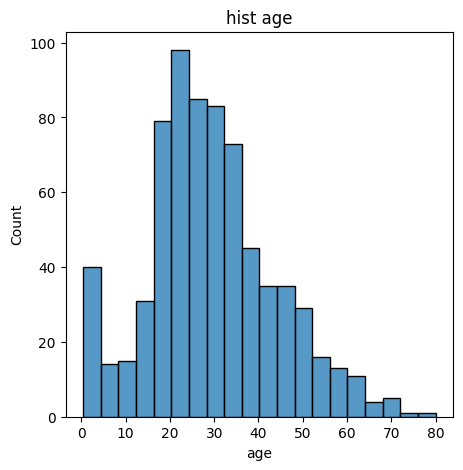

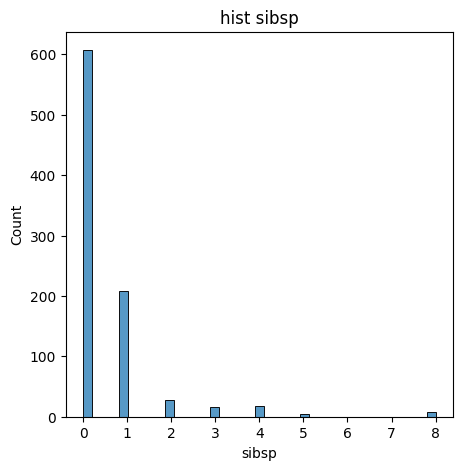

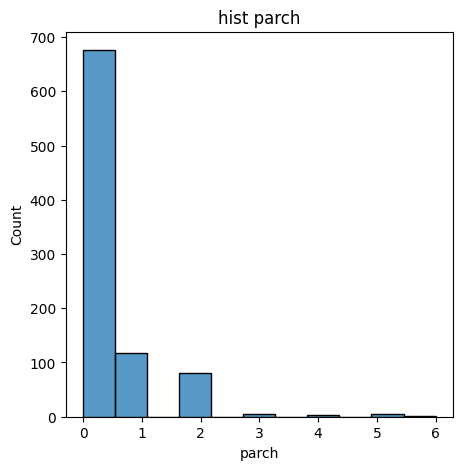

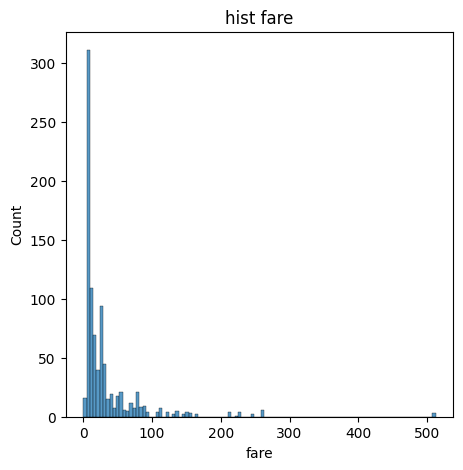

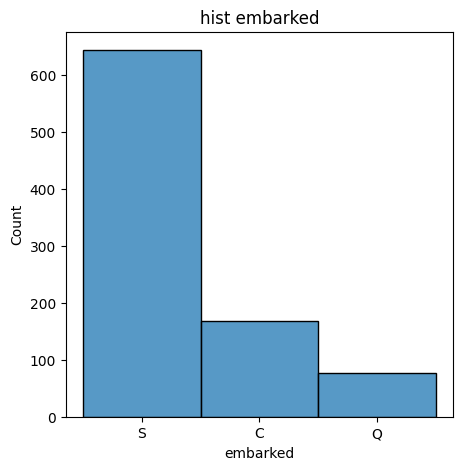

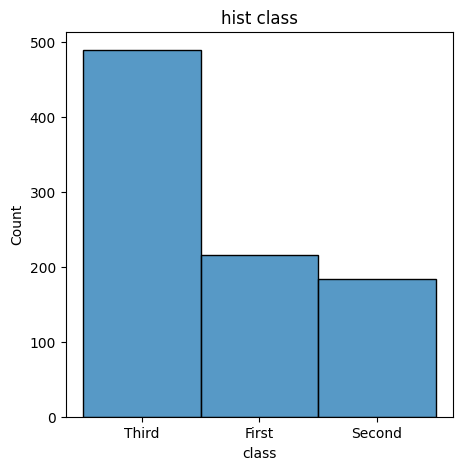

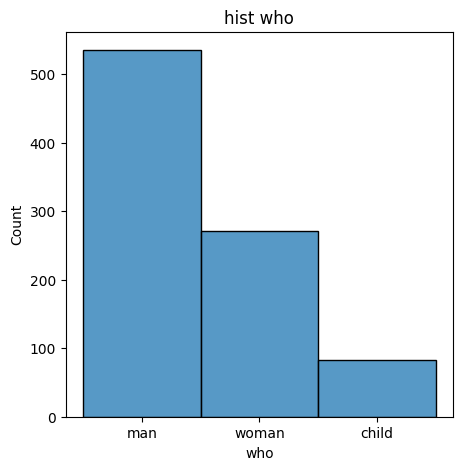

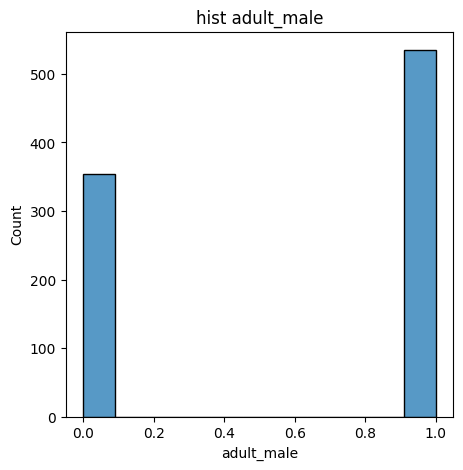

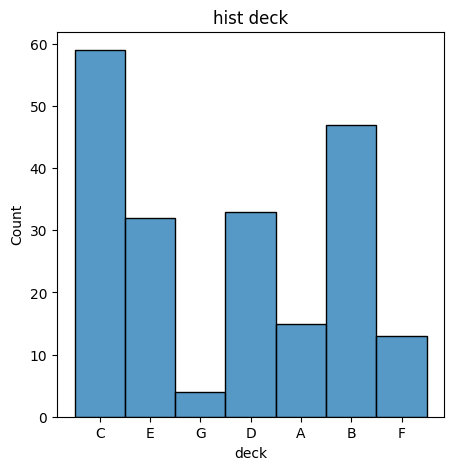

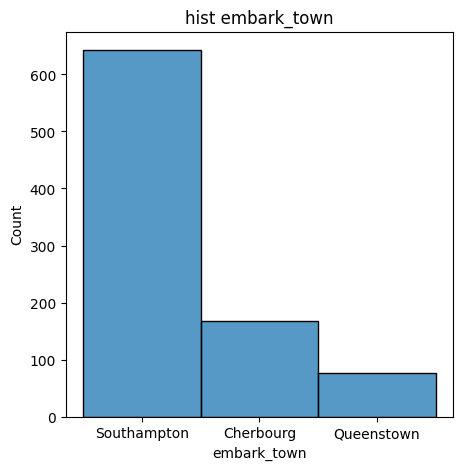

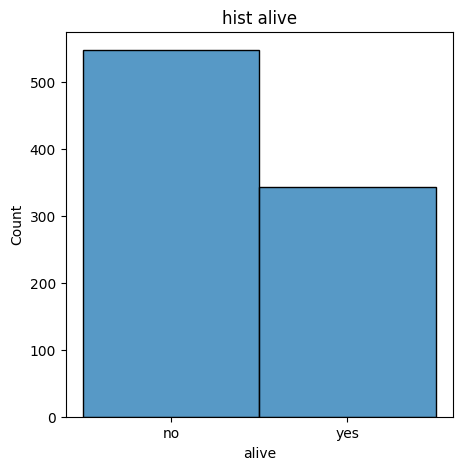

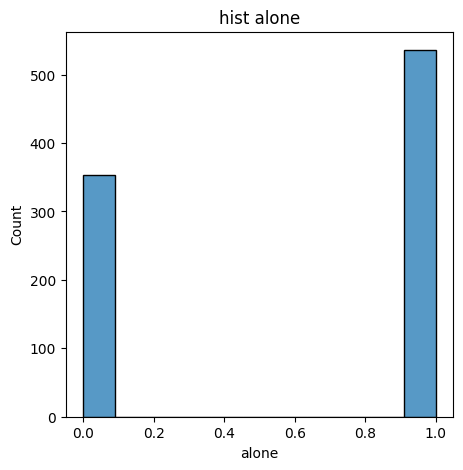

In [7]:
#to do visualiztion of features and their freqency
for col in df.columns:
  fig,ax=plt.subplots(figsize=(5,5))
  plt.title(f"hist {col}")
  sns.histplot(x=col,data=df,ax=ax)
  plt.show()

In [6]:
num_col=df.select_dtypes(include="number")
num_col_cor=num_col.corr()
num_col_cor

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.337508,-0.077234,-0.035393,0.080865,0.256684
pclass,-0.337508,1.000000,-0.369468,0.083204,0.019344,-0.549158
age,-0.077234,-0.369468,1.000000,-0.308297,-0.189139,0.096099
sibsp,-0.035393,0.083204,-0.308297,1.000000,0.415016,0.159710
parch,0.080865,0.019344,-0.189139,0.415016,1.000000,0.215815
fare,0.256684,-0.549158,0.096099,0.159710,0.215815,1.000000


# **handling null values**

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
#fill missing value in 'age' column with mean
df["age"].fillna(df['age'].mean(),inplace=True)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
#replace categorical column 'embark_town' with mode
df['embark_town'].fillna(df['embark_town'].mode(),inplace=True)

In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [18]:
#drop 'deck' column which have too much nulls
df.drop('deck', axis=1, inplace=True)

KeyError: "['deck'] not found in axis"

In [ ]:
df.isnull().sum()

In [ ]:
#fill 'embarked' col eith mode
df['embarked'].fillna(df['embarked'].mode(),inplace=True)

In [ ]:
df.isnull().sum()

# **outliers**



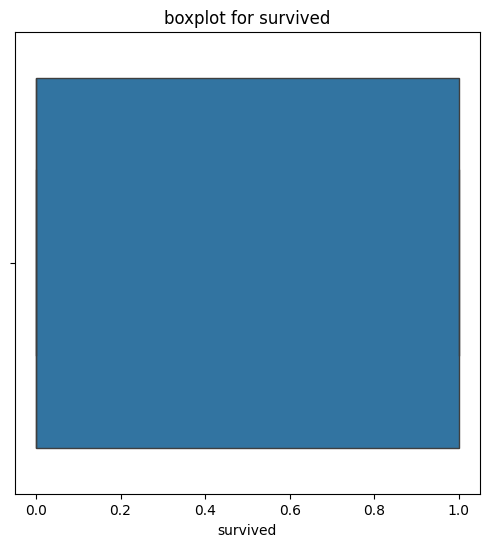

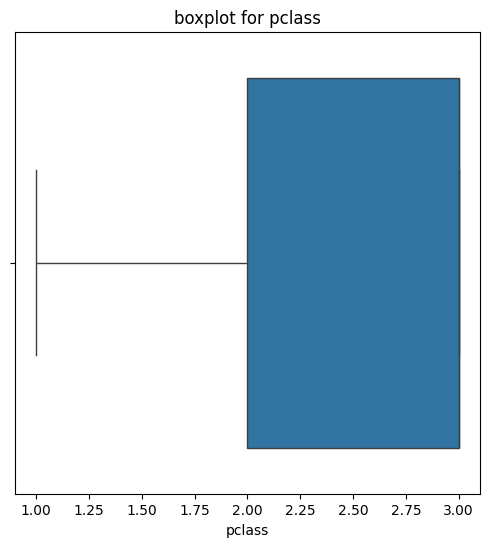

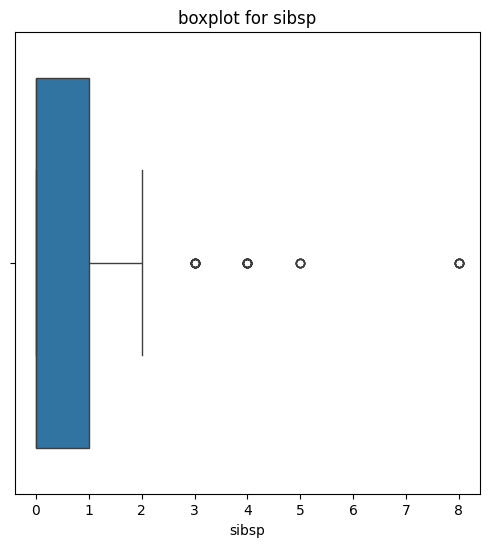

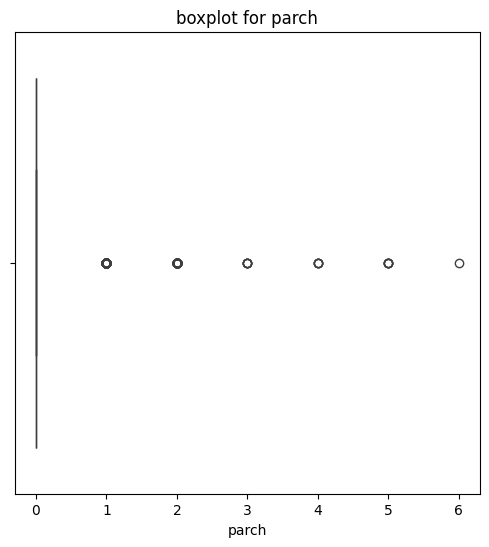

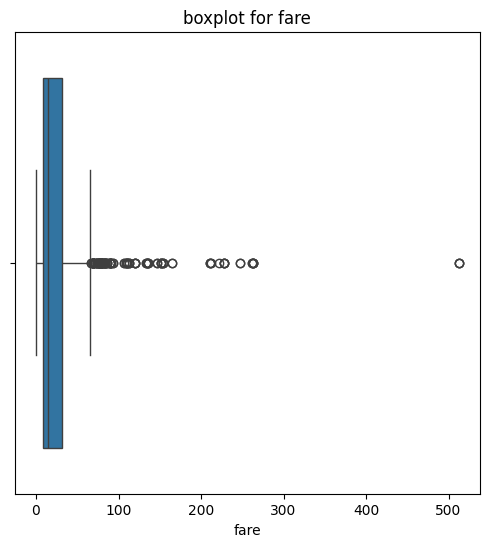

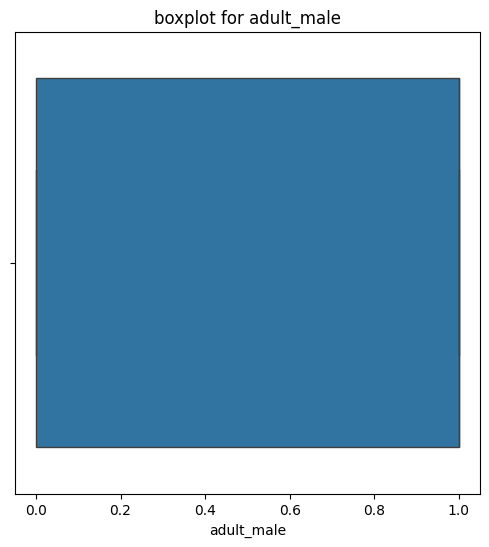

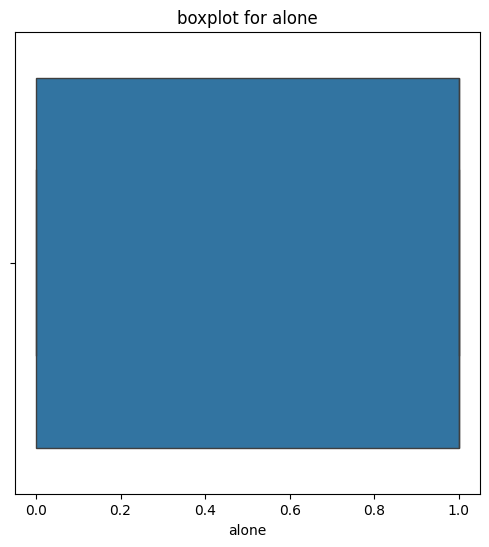

In [ ]:
#check for outlier
for col in df.columns:
  if df[col].dtype!='object':
    fig,ax=plt.subplots(figsize=(6,6))
    ax.set_title(f"boxplot for {col}")
    sns.boxplot(data=df,x=col)
    plt.show()

In [ ]:
#drop 'sibsp''s  outlier
df.drop(df[df['sibsp']>2].index,axis=0,inplace=True)
sns.scatterplot(data=df,x='sibsp',y='survived')
plt.show()

In [ ]:
#drop 'parch' 's  outlier
df.drop(df[df['parch']>1].index,axis=0,inplace=True)
sns.scatterplot(data=df,x='parch',y='survived')
plt.show()

In [ ]:
#drop 'fare' 's outliers
df.drop(df[df['fare']>95].index,axis=0,inplace=True)
sns.scatterplot(data=df,x='fare',y='survived')
plt.show()

# **encoding data**

In [21]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
dtype: object

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df["embarked"] = le.fit_transform(df["embarked"])
df["sex"] = le.fit_transform(df["sex"])
df["embark_town"] = le.fit_transform(df["embark_town"])
df["class"] = le.fit_transform(df["class"])
df["alive"] = le.fit_transform(df["alive"])
df["who"] = le.fit_transform(df["who"])
df["adult_male"] = le.fit_transform(df["adult_male"])
df["alone"] = le.fit_transform(df["alone"])


In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
ef=encoder.fit_transform(df[['embarked','sex','embark_town','class','alive','who',"adult_male","alone"]])

In [24]:
df.dtypes

survived         int64
pclass           int64
sex              int32
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int32
class            int32
who              int32
adult_male       int64
embark_town      int32
alive            int32
alone            int64
dtype: object

# **Normalization and Scalar**

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df[['age','fare']]=scalar.fit_transform(df[['age','fare']].values)


In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,-0.591783,1,0,-0.503121,2,2,1,1,2,0,0
1,1,1,0,0.638104,1,0,0.785071,0,0,2,0,0,1,0
2,1,3,0,-0.284311,0,0,-0.489541,2,2,2,0,2,1,1
3,1,1,0,0.407500,1,0,0.419268,2,0,2,0,2,1,0
4,0,3,1,0.407500,0,0,-0.487026,2,2,1,1,2,0,1


In [ ]:
#logistic regression

In [29]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X=df.drop(['survived'],axis=1)
y=df['survived']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[103   0]
 [  0  75]]


In [ ]:
#SVM

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
# Create an SVM classifier with a linear kernel
model_svm = SVC(kernel='linear')

# Train the SVM model
model_svm.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = model_svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the SVM results
print("SVM Results:")
print("Accuracy:", accuracy_svm*100)
print("Confusion Matrix:\n", conf_matrix_svm)



SVM Results:
Accuracy: 100.0
Confusion Matrix:
 [[103   0]
 [  0  75]]


In [ ]:
# random forest

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[103   0]
 [  0  75]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        75

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



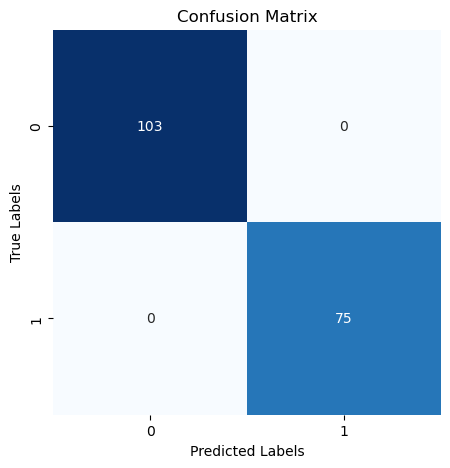

In [42]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()